In [1]:
# Bo warning
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [2]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

from utils import (
    read_image_from_path,
    folder_to_images
)

from feature_extractor import FeatureExtractor

In [3]:
def absolute_difference(query, X):
    axis_batch_size = tuple(range(1,len(X.shape)))
    return np.sum(np.abs(X - query), axis=axis_batch_size)

In [4]:
def mean_square_difference(query, X):
    axis_batch_size = tuple(range(1,len(X.shape)))
    return np.mean((X - query)**2, axis=axis_batch_size)

In [5]:
def cosine_similarity(query, X):
    axis_batch_size = tuple(range(1,len(X.shape)))
    # Ứng dụng norm
    query_norm = np.sqrt(np.sum(query**2))
    X_norm = np.sqrt(np.sum(X**2, axis=axis_batch_size))
    return np.sum(X * query, axis=axis_batch_size) / (query_norm*X_norm + np.finfo(float).eps)

In [6]:
def correlation_coefficient(query, X):
    
    axis_batch_size = tuple(range(1,len(X.shape)))
    
    # Ứng dụng mean
    query_mean = query - np.mean(query)
    X_mean = X - np.mean(X, axis=axis_batch_size, keepdims=True)
    
    # Ứng dụng norm
    query_norm = np.sqrt(np.sum(query_mean**2))
    X_norm = np.sqrt(np.sum(X_mean**2, axis=axis_batch_size))
    
    return np.sum(X_mean * query_mean, axis=axis_batch_size) / (query_norm*X_norm + np.finfo(float).eps)

In [7]:
similarities_measure = [absolute_difference, mean_square_difference, cosine_similarity, correlation_coefficient]

In [8]:
turn_on_cnn = True
if turn_on_cnn:
    root_fearure_path = "feature/all_feartures.npz"
    
    data = np.load(root_fearure_path)
    paths_feature = data["array1"]
    imgs_feature = data["array2"]
    
    fe = FeatureExtractor()

In [9]:
i_select = 2

In [10]:
query_path = "big_smile_high.jpg"
size = (224, 224)
query = read_image_from_path(query_path, size)

(dtype('float32'), (224, 224, 3))

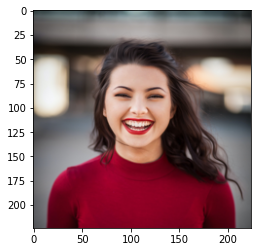

In [11]:
plt.imshow(query/255.0);
query.dtype, query.shape

In [12]:
turn_on_cnn

True

In [13]:
similarities_measure[i_select].__name__

'cosine_similarity'

In [13]:
%%time
ls_path_score = []

if turn_on_cnn:
    
    query_vector = fe.extract(query[None, :]) # trichs xuat anh query thanh vector
    rates = similarities_measure[i_select](query_vector, imgs_feature)
    ls_path_score = list(zip(paths_feature, rates))
    
else:
    root_img_path = "img/"
    dic_categories = ['scenery', 'furniture', 'animal', 'plant']
    
    for folder in os.listdir(root_img_path):
        if folder.split("_")[0] in dic_categories:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path)
            rates = similarities_measure[i_select](query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))

CPU times: user 926 ms, sys: 191 ms, total: 1.12 s
Wall time: 1.23 s


In [14]:
len(ls_path_score)

17044

In [15]:
m_sample = 30
sort_ls_path_score = sorted(ls_path_score, key=lambda x : x[1], reverse=(i_select > 1))[:m_sample]

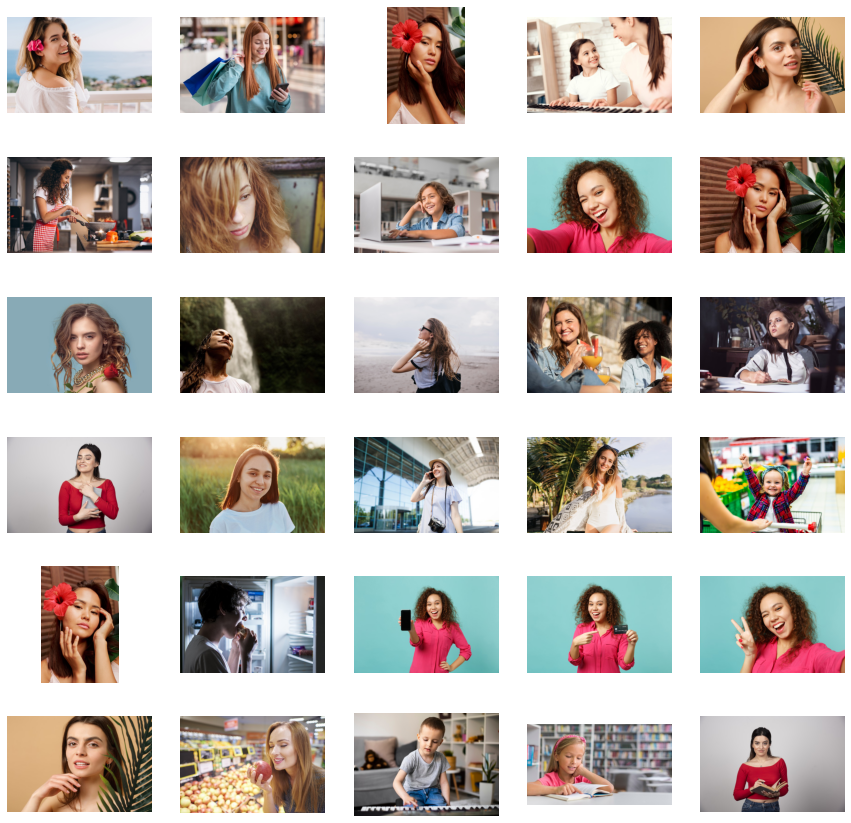

In [16]:
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 6
for i, path in enumerate(sort_ls_path_score, 1):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(rows, columns, i)
    plt.imshow(plt.imread(path[0]))
    plt.axis("off")
plt.show()

In [ ]:
# import cv2
# im = cv2.imread("big_smile_high.jpg")
# # Select ROI
# r = cv2.selectROI(im, False)

# # Crop image
# imCrop = im[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]

# # Display cropped image
# cv2.imshow("Image", imCrop)
# cv2.waitKey(0)
# cv2.destroyAllWindows()